# Building a Neural Network

## Introduction:

This project will cover what neural networks are and its implementation in Python for the tass of basic recognition. This project will also explore the domain of computer vision and how it is an automation of extracting information from digital images. There are a lot of applications for computer vision such as control systems to be used in industry, facial filters in mobile apps, or security surveillance systems.

Computer vision can also be broken down into the following:
- Content recognition (Object Identification, Object detection and localisation, Object and instance segmentation or Pose estimation).
- Video analysis (Instance Tracking, Action recognition, Motion estimation).
- Content-Aware image edition.
- Scene Reconstruction.

## Breakdown of this Notebook:
- Biological neuron and its mathematical model
- Building an ANN from scratch

## 1 - Biological neuron and its Mathematical model:

Artificial Neural Networks (ANNs) are great at processing information, finding patterns and approximating complex processes. This is largely due to its structure. The structure of ANNs are drawn from the biological neuron itself.

## 1.1 - Biological Neuron:

The following shows a neuron (act ass a simple signal processing unit) that forms part of our brain, where it is built up as a large complex network of neurons that are able to process sensory inputs from the environment and turn it into thoughts or actions. The way the neuron works is explained in the following:
- Dendrites -> are where the neuron will receive the electrical inputs, this are then propagated from the synapses to the soma.
- Some -> is the main body of the neuron and it accummulates the electrical stimulation to a certain threshold, until which it will become activated. This means that the electrical impulses would be propagated further down the axon.
- Axon -> is described as the output cable of these signals where it ends in multiple synapses. These synapses can be linked to other neurons. 

## 1.2 Mathematical Model of a Neuron:

Overall, an Artificial Neuron can take in several inputs, proceeds to sum them together and then by aplying an activation function to obtain the output signal. This process can be broken down into its mathematical components.

In [1]:
import os
from IPython.display import Image

# Set up the working directory for the images:
image_folderName = 'Description Images'
image_path = os.path.abspath(image_folderName) + '/'

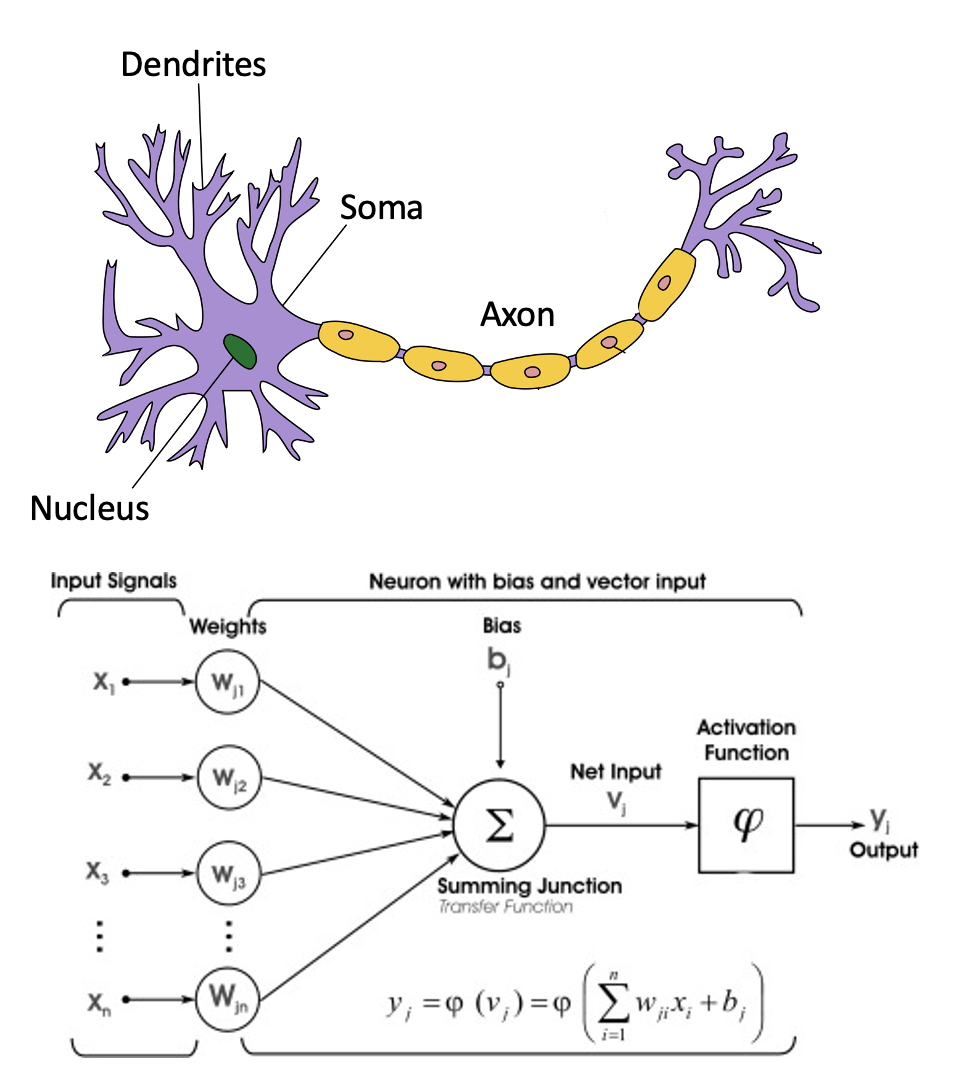

Image ref -> https://en.wikipedia.org/wiki/Neuron
Image ref -> https://www.sciencedirect.com/science/article/pii/S2214317316300427


In [2]:
# Neuron bio and math model: 
display(Image(image_path + 'Neuron bio and math model.png', width=700, unconfined=True))
print('Image ref -> https://en.wikipedia.org/wiki/Neuron')
print('Image ref -> https://www.sciencedirect.com/science/article/pii/S2214317316300427')

### Mathematical Description:

Firstly, the following vectors from the image above are shown as:

n = number of inputs
[$x_{1}$, $x_{2}$, ..., $x_{n}$] = Input Vector (represented as __X__) \
[$w_{j1}$, $w_{j2}$, ..., $w_{jn}$] = Weights that are bouded to the input connections of neuron "j" (represented as __W__). \
[$b_{1}$, $b_{2}$, ..., $b_{n}$] = Bias Vector (represented as __b__)\
[$y_{1}$, $y_{2}$, ..., $y_{n}$] = Ouput signal (represented as __Y__).

The neuron will take in an input vector (__X__) where it will then be weighted by the vector (__W__) to each of the input and be summed together with the bias __b__. This can be expressed as the following:

$V_{j}$ = __X__ * __W__ + __b__

where, 

 __X__ * __W__ + __b__ = $\sum\limits_{i=1}^{n} w_{ji} * x_{i} + b_{j}$ where j = 1, 2, ..., m

is a __Dot Product__ of the two vectors and the addition of the bias. The results of the sum is $V_{j}$ where it is then applied with am __Activation Function__ to obtain the neuron's output. 

Activation function is:

$Y_{j} = \varphi (V_{j})$

Here the Activation function is set to be a __Step Function__ meaning that if $V_{j}$ is less than the threshold (t), it will be set to 0 whereas if $V_{j}$ is more than the threshold (t), it will be set to 1. The Step Function is one of many types of activation functions that can be used, the following will list more examples of activation functions.

### Types of Activation Functions:

1. Sigmoid Function.
2. Hyperbolic Tangent function.
3. ReLU function.

For more information:
- https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/


## 2 - Building the Artificial neuron (perception):

In [3]:
# set the seed number:
seed_nb = 42

In [4]:
import numpy as np

In [5]:
class Neuron(object):
    """ This builds a simple feed foward artificial neuron.
    Args:
        - num_inputs (int): The number of input values or input vector size.
        - activation_func (callable): The activation function.
    Attributes:
        - W (ndarray): Weight values for each of the input.
        - b (float): The bias value, which is added to the weighted sum.
        - activation_func (callable): The activation function.
    """
    
    def __init__(self, num_inputs, activation_func):
        super().__init__()
        # Random initialisation of the weight vector and bias:
        self.W = np.random.rand(num_inputs)
        self.b = np.random.rand(1)
        self.activation_func = activation_func
    
    def forward(self, x):
        """ This builds the Forward pass of the input signal through the neuron.
        
        """
        
        z = np.dot(x, self.W) + self.b
        
        return self.activation_func(z)

## 2.1 - Test out the Artificial Neuron:

Instantiate the perceptron and forward some random input values through it.

In [6]:
# Set seed for reproducibility:
np.random.seed(seed_nb)

# Generate random input values: Shape of matrix is (1, 3)
x = np.random.rand(3).reshape(1, 3)
print('Input -> {}'.format(x))

# Instantiating the perceptron to pass the x input values:
# Create a step function:
step_func = lambda y: 0 if y <= 0 else 1

# Perceptron:
perceptron = Neuron(
    num_inputs = x.size, 
    activation_func = step_func
)

output = perceptron.forward(x)
print('Output is -> {}'.format(output))

Input -> [[0.37454012 0.95071431 0.73199394]]
Output is -> 1


## 3 - Layering the Neurons together:

Organising these individual neurons into a network of connected layers would improve its capabilities. This is where a set of neurons would take in an input vector and apply the same type of operation however, the dot products with the weigths are specific to each neuron. 

The diagram below is used to demonstrate a fully connected layer. For Neural Networks, the data will flow from the input layer through to the output layer, where between these will be one (or more) hidden layers. Starting wwith the Nodes A, B and C, this is the input layer and Nodes D, E, F and G resides in the hidden layer, lastly, Node H is the output/activation layer. 

Taking an input __X__ which has a size of 2 (meaning $x_{0}$ and $x_{1}$) in the first layer, the second layer which is the hidden layer will then take in these 3 activation values of the last layer as its inputs. Depending on the amount of hidden layers, this continues from one hidden layer to the next. These activated values will eventually reach the output layer, where here it is the 3rd layer in the network. For these layers where each of these neurons are connected to all the values from the previous layer can be termed as a __Fully Connected__ network.


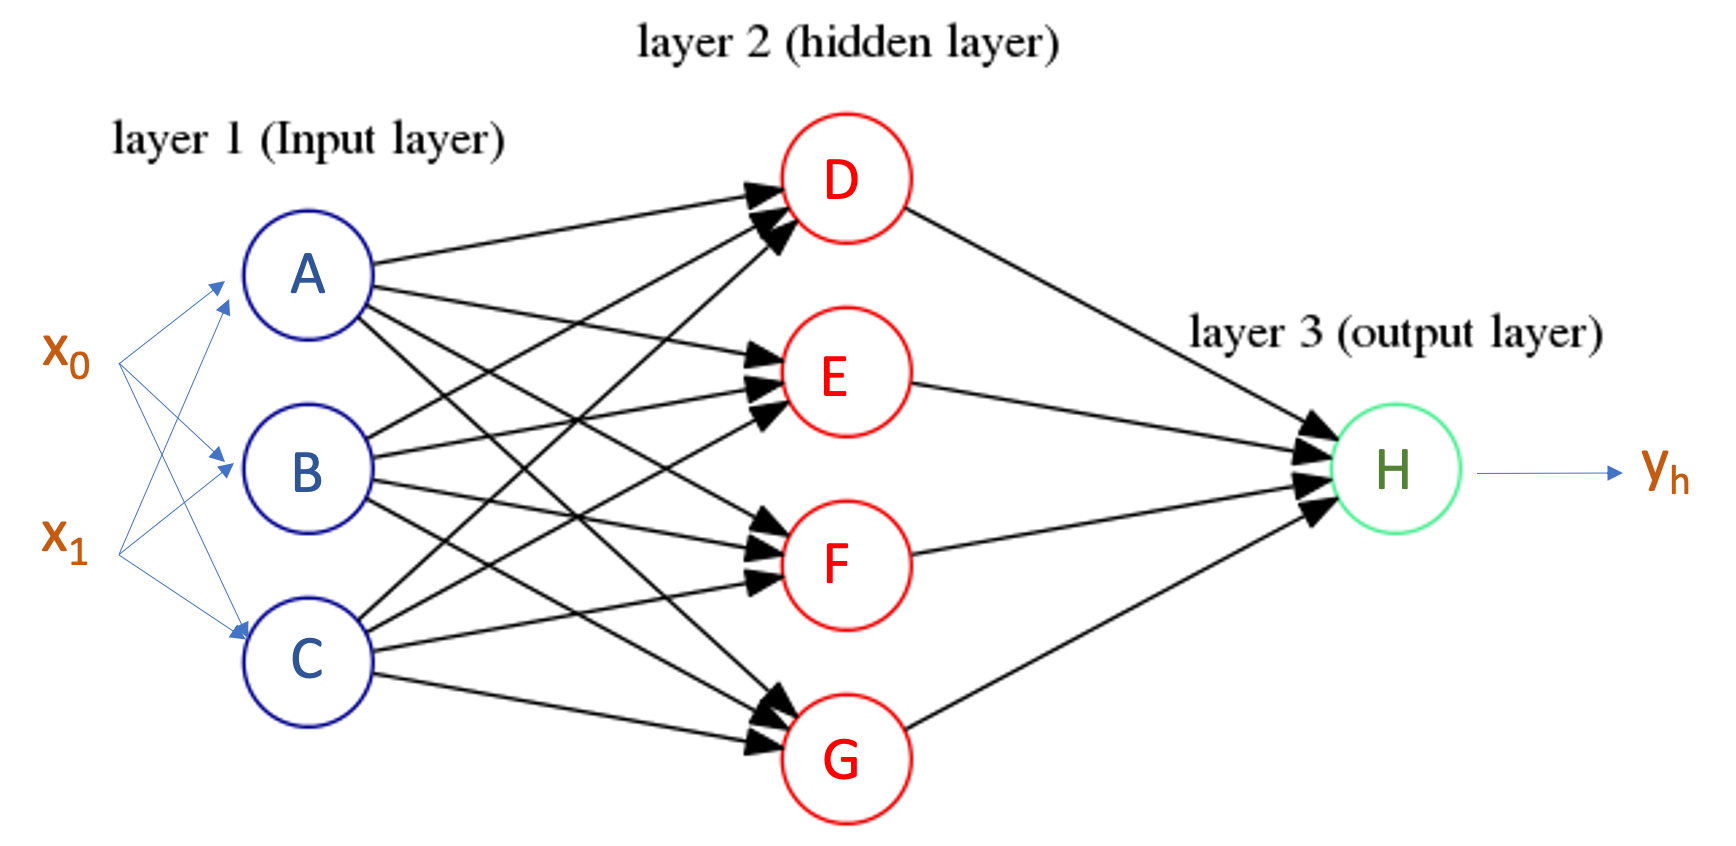

Image ref -> https://medium.com/emergent-future/spam-detection-using-neural-networks-in-python-9b2b2a062272


In [7]:
# Fully Connected Layer: 
display(Image(image_path + 'FullyConnectedLayer.png', width=700, unconfined=True))
print('Image ref -> https://medium.com/emergent-future/spam-detection-using-neural-networks-in-python-9b2b2a062272')

### Mathematical Description:

The following formulas are representing each of these elements as vectors (or matrices). 

Taking the __first layer__, where for each neuron in the this layer:

$z_{A}$ = x * $w_{A}$ + $b_{A}$ \
$z_{B}$ = x * $w_{B}$ + $b_{B}$ \
$z_{C}$ = x * $w_{C}$ + $b_{C}$

Overall, these can be combined and be expressed as the following:

z = x * __W__ + b

Further the following variables should be defined:

For the __Weight__ matrix -> 

$W = $$\begin{pmatrix} \vdots & \vdots & \vdots \\ w_{A} & w_{B} & w_{C} \\ \vdots & \vdots & \vdots \end{pmatrix}$$ = $$\begin{pmatrix} w_{a1} & w_{b1} & w_{c1} \\ w_{a2} & w_{b2} & w_{c2} \\ \end{pmatrix}$$ $

For the __Bias__ matrix -> 

$b = $$\begin{pmatrix} b_{A} & b_{B} & b_{C} \end{pmatrix}$$ $

For the __Z__ matrix of the first layer -> 

$z = $$\begin{pmatrix} z_{A} & z_{B} & z_{C} \end{pmatrix}$$ $

Before passing these values as the input for the next layer (layer 2/hidden layer), they have to be passed into the activation function first:

$y = f(z) = (f(z_{A}) f(z_{B}) f(z_{C}))$

Now, the values of $y$ can be used as the vector for the next layer in the network. This process continues until the last layer of the network.

## 4 - Building the Fully Connected NN Model:

It should be noted as dealing with matrices, the operations within and between eaach layers rely on the dimensionality being in the correct format.

In [8]:
# Import the required libraries: 
import numpy as np

In [9]:
class FullyConnectedLayer(object):
    """ This builds a Fully Connected NN Layer.
    Args:
        - num_inputs (int): The number of input values or input vector size.
        - layer_size (int): The number of output values or output vector size.
        - activation_func (callable): The activation function for this layer.
    Attributes:
        - W (ndarray): Weight values for each of the input.
        - b (float): The bias value, which is added to the weighted sum.
        - size (int): The size of the layer or number of neurons present.
        - activation_func (callable): The activation function.
    """
    
    def __init__(self, num_inputs, layer_size, activation_func):
        super().__init__()
        
        # Random initialisation of the weight vector and bias:
        self.W = np.random.standard_normal((num_inputs, layer_size))
        self.b = np.random.rand(layer_size)
        self.size = layer_size
        self.activation_func = activation_func
        
    def forward(self, x):
        """ This builds the Forward pass of the input signal through the neuron.
        
        """
        
        z = np.dot(x, self.W) + self.b
        
        return self.activation_func(z)

## 4.1 - Test out the Layered network: 

In [10]:
# Set seed for reproducibility:
np.random.seed(seed_nb)

# Generate random input values: an input column vector of 2 values, Shape of matrix is (1, 2)
x1 = np.random.uniform(-1, 1, 2).reshape(1, 2)
x2 = np.random.uniform(-1, 1, 2).reshape(1, 2)
print('Input -> \n {} \n {}'.format(x1, x2) + '\n')

# # Instantiating the FullyConnected Layer to pass the x input values:
# # Create a ReLU function:
relu_func = lambda y: np.maximum(y, 0)

layer = FullyConnectedLayer(num_inputs = 2,
                            layer_size = 3, 
                            activation_func = relu_func)

# Output the results separately:
output_1 = layer.forward(x1)
print('Output 1 is -> {}'.format(output_1))

output_2 = layer.forward(x2)
print('Output 2 is -> {}'.format(output_2))


Input -> 
 [[-0.25091976  0.90142861]] 
 [[0.46398788 0.19731697]]

Output 1 is -> [[0.9323663  0.         0.39706569]]
Output 2 is -> [[0.22460853 0.         1.14403416]]


### Concatenate the input results:

This will have a 2x2 matrix that is the input for the Fully Connected Layer.

In [11]:
# Concatenate the Input Results:
x_12 = np.concatenate((x1, x2))
print('Input -> \n {} '.format(x_12) + '\n')


# Output:
output_12 = layer.forward(x_12)
print('Output is -> \n {}'.format(output_12))

Input -> 
 [[-0.25091976  0.90142861]
 [ 0.46398788  0.19731697]] 

Output is -> 
 [[0.9323663  0.         0.39706569]
 [0.22460853 0.         1.14403416]]


With this kind of implementation, a simple neural network can be constructed by chaining fully connected layers together.

## 5 - Apply the network to perform Classification:

This section will cover the initialisation and connection of the neurons into a proper fully connected network to be for classidication task (for computer vision tasks). Therefore, the __MNIST__ digits dataset will be used for this task. More specifically, the idea is to t construct a network that will take one of these images as the input of the network and it will return an output vector that expresses how strongly it believes the image belongs to a certain class.  

## 5.1 - Background on the Dataset: MNIST Digits.

The dataset can be obtain from the link: http://yann.lecun.com/exdb/mnist/

The MNIST Digits daataset contians 70,000 greyscale images that have 28 x 28 pixels for each of the image. This dataset has been a reference set over the last few years to test and improve methods for this recognition task. The Input vector for the network works out to be 28 x 28 = 784 values and it has an output of 10 values (where there are 10 different digits ranging from 0 to 9). Further, the number of hidden layers for this network will be up to the modeller. 

## 5.2 - Loading in the Dataset:

The data can also be directly loaded in by using the the "minst" Python module. To install -> https://pypi.org/project/mnist/ or "pip install mnist" 
The data should be prepared by splitting into two sets that are the training aand testing sets.

In [12]:
# Import the required Libraries:
import numpy as np
import mnist

np.random.seed(seed_nb)

In [13]:
# Load in the Training dataset:
X_train, y_train = mnist.train_images(), mnist.train_labels()

# Load in the Testing dataset:
X_test, y_test = mnist.test_images(), mnist.test_labels()

# Set the Number of Classes:
nb_classes = 10

In [14]:
# Inspect:
X_train.shape

(60000, 28, 28)

In [15]:
# Inspect:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## 5.3 - Dataset Preprocessing:

Transform the images into the required column vectors to be used as the input for the Neural Network.

In [16]:
# Flatten the data into a single row of vectors:
X_train, X_test = X_train.reshape(-1, 28*28), X_test.reshape(-1, 28*28)

# Inspect:
X_train.shape

(60000, 784)

In [17]:
# One-hot encode the labels:
y_train = np.eye(nb_classes)[y_train]

# Inpsect:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

## 5.4 - Implement the FEED-FORWARD network:

This section will wrap the layers of the network together with the addition of methods that will forward through the complete network. This network will then be able to predict the class from the input values and produce the predicted output vector.

In [18]:
# Import the required libraries:
import numpy as np
# from NeuralNetwork_Utilities import FullyConnectedLayer

In [19]:
# Define the Activation function: Sigmoid Activation function.

# This will apply the sigmoid function to the elements of x.
def sigmoid(x):
    y = 1/(1 + np.exp(-x))
    return y

In [20]:
# Define the Simple Network model:

class SimpleNetwork(object):
    """ This builds a simple neural network model, that is a simple fully connected NN.
    Args:
        - num_inputs (int): The number of input values or input vector size.
        - num_outputs (int): The output vector size.
        hidden_layers_sizes (list): A list of sizes for each of the hidden layer that is added to the NN.

    Attributes:
        - layers (list): The list of layers that would form this simple network model.
    
    """
    def __init__(self, num_inputs, num_outputs, hidden_layers_sizes = ((64, 32)) ):
        super().__init__()
        
        # Build the list of layers for the network:
        sizes = [num_inputs, *hidden_layers_sizes, num_outputs]
        self.layers = [
            FullyConnectedLayer(num_inputs = sizes[i], layer_size = sizes[i+1], activation_func = sigmoid) for i in range(len(sizes) - 1)
        ]
        
    def forward(self, x):
        """ Forward the input vector X through the layers of the network. """
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def predict(self, x):
        """ Compute the output that is corresponding to X, and returns the index of the largest output value. """
        estimations = self.forward(x)
        best_class = np.argmax(estimations)
        return best_class
    
    def evaluate_accuracy(self, X_val, y_val):
        """ Evaluates the network's accuracy based on the a validation dataset. """
        nb_corrects = 0
        for i in range(len(X_val)):
            pred_class = self.predict(X_val[i])
            if ( pred_class == y_val[i] ):
                nb_corrects += 1
                
        return nb_corrects / len(X_val)

## 5.5 - Test out the SimpleNetwork on the classification task:

Configuration of the SimpleNetwork:
- Consists of 2 hidden layers that are of sizes 64 and 32.
- This means that it is a 4 layer network, where the first hidden layer has 64 nodes.
- The second hidden layer has 32 nodes.


In [21]:
# Instantiate the network:
digits_simpleNetwork_classifier = SimpleNetwork(num_inputs = X_train.shape[1],
                                                num_outputs = nb_classes,
                                                hidden_layers_sizes= [64, 32])

In [22]:
# Evaluate the results of the model:
accuracy = digits_simpleNetwork_classifier.evaluate_accuracy(X_val = X_test,
                                                             y_val = y_test)

print("accuracy = {:.2f}%".format(accuracy * 100))

/Users/y.s.lee/opt/anaconda3/envs/Py37Work/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


accuracy = 10.11%


### Observation: 

As it can be seen, the accuracy of this simple network is around 10%, which means that currently it is not that much better than randomly guessing the outcome. This is made possible because the network is defined by random parameters and has not been trained yet. Therefore, training the model to improve its resutls will be in the next section.

## 6 - Training the Neural Network:


Please make sure that both the 'keras', 'tensorflow' and 'Python Imaging Library' packages haven been installed.

For AMD GPU: see https://plaidml.github.io/plaidml/docs/install to use it as the Backend for Keras.

In [ ]:
# For those who has AMD GPU and uses PlaidML for the Keras Backend: run the following code to use AMD GPU instead.
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"